# Chest X-Ray Images for Pneumonia

## Table of Contents

1. Introduction
2. Importing
3. Exploring the Disease Labels
4. Image Manipulation

### 1. Introduction 

This project is based off of the the following Kaggle competition: https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia. The goal of this competitiion is to take Chest X-rays and classify the patients image as normal or having pneumonia present. In this notebook, we will look at the images by catergory and explore some different image manipulation techniques.

### 2. Importing

In [1]:
import numpy as np 
import pandas as pd 
import random
import os
import glob
from PIL import Image
import matplotlib.pyplot as plt
plt.rc('image', cmap='gray')
import time
from datetime import timedelta
import math
import cv2

In [2]:
## Setting up lists to use later

categories = ['NORMAL', 'PNEUMONIA']
datasets = ['train', 'test']

In [3]:
## Finding the average height and width of the images for importing

widths = []
heights = []

for sets in datasets:
    for cat in categories:
        filelist = glob.glob('/Users/kasey.larsen/Documents/GitHub/Chest-X-Ray-Images-Pneumonia-/chest_xray/' + sets + '/' + cat + '/*.jpeg')
        widths.extend([Image.open(fname).size[0] for fname in filelist])
        heights.extend([Image.open(fname).size[1] for fname in filelist])

images_size = pd.DataFrame({"widths": widths, "heights": heights})
        
print("Average image width: ", round(images_size["widths"].mean(), 2))
print("Average image height: ", round(images_size["heights"].mean(), 2))


Average image width:  1327.83
Average image height:  970.6


In [4]:
# Creating variables for later use and finding best image height and width.

im_width = int(images_size["widths"].mean()/10)
im_height = int(images_size["heights"].mean()/10)
print("image width: " , str(im_width))
print("image height: " , str(im_height))

image width:  132
image height:  97


In [5]:
## Importing images into an X list and y_names list. 

X = []
y_names = []

for sets in datasets:
    for cat in categories:
        filelist = glob.glob('/Users/kasey.larsen/Documents/GitHub/Chest-X-Ray-Images-Pneumonia-/chest_xray/' + sets + '/' + cat + '/*.jpeg')
        y_names.extend([cat for _ in filelist])
        X.extend([np.array(Image.open(fname).convert('L').resize((im_width, im_height))) for fname in filelist])
#
X_array = np.stack(X, axis=0)

In [6]:
X_array.shape

(5840, 97, 132)

### 3. Exploring the Disease Labels

In [7]:
normal_count = y_names.count('NORMAL')
pneumonia_count = y_names.count('PNEUMONIA')

In [8]:
print("Percentage of Dataset:")
print("- Normal:\t\t{}".format(normal_count/len(y_names)))
print("- Pneumonia:\t\t{}".format(pneumonia_count/len(y_names)))

Percentage of Dataset:
- Normal:		0.2696917808219178
- Pneumonia:		0.7303082191780822


#### Interestingly, 73% of our data is for patients who have pneumonia. This will be something to keep in mind during the modeling phase of the project later.

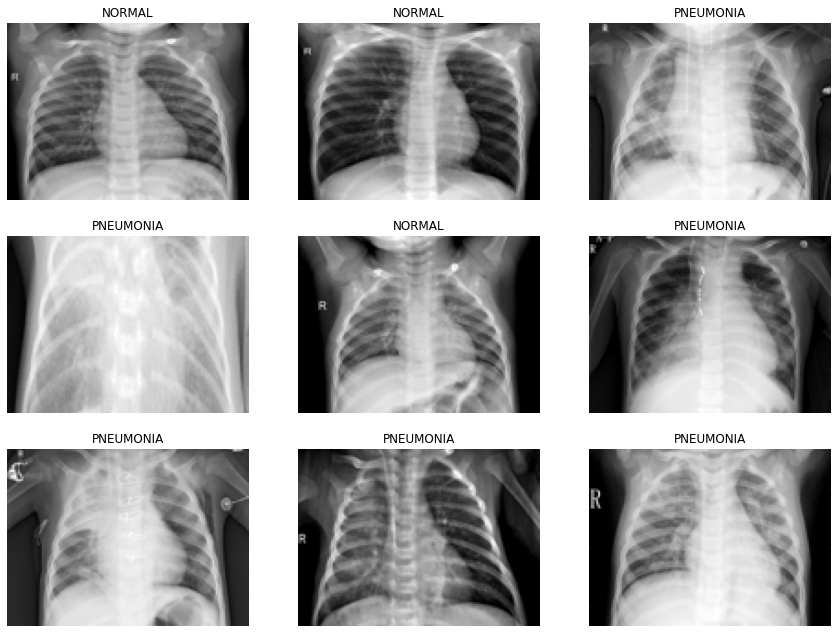

In [9]:
fig = plt.figure(figsize=(20,15))
gs = fig.add_gridspec(4, 4)
#
for line in range(0, 3):
    for row in range(0, 3):
        num_image = random.randint(0, X_array.shape[0])
        ax = fig.add_subplot(gs[line, row])
        ax.axis('off');
        ax.set_title(y_names[num_image])
        ax.imshow(X_array[num_image]);

#### There seems to be a difference in the images for normal and pneumonia patients. In patients with normal results, the images seem to be clearer and their lungs look to be less enlarged. 

### 4. Image Manipulation

#### In this section, I will look into different image manipulation techniques to explore the images further. 

In [10]:
image_1 = X_array[1]
image_2 = X_array[5800]

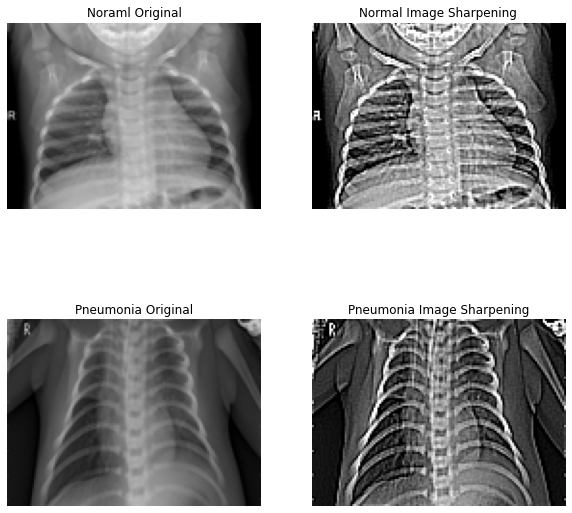

In [11]:
#Sharpening
picture_1 = cv2.cvtColor(image_1, cv2.COLOR_BGR2RGB)
picture_2 = cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB)

kernel_sharpening = np.array([[-1,-1,-1], 
                              [-1,9,-1], 
                              [-1,-1,-1]])

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.title('Noraml Original')
plt.axis('off')
plt.imshow(picture_1)

sharpened_1 = cv2.filter2D(picture_1, -1, kernel_sharpening)
sharpened_2 = cv2.filter2D(picture_2, -1, kernel_sharpening)

plt.subplot(2, 2, 2)
plt.title('Normal Image Sharpening')
plt.axis('off')
plt.imshow(sharpened_1)

plt.subplot(2, 2, 3)
plt.title('Pneumonia Original')
plt.axis('off')
plt.imshow(picture_2)

plt.subplot(2, 2, 4)
plt.title('Pneumonia Image Sharpening')
plt.axis('off')
plt.imshow(sharpened_2)

plt.show()

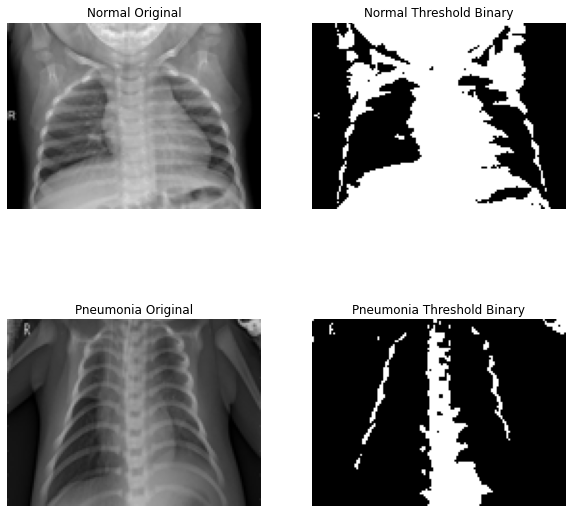

In [12]:
#Threshold Binary
picture_1 = cv2.cvtColor(image_1, cv2.COLOR_BGR2RGB)
picture_2 = cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.title('Normal Original')
plt.axis('off')
plt.imshow(picture_1)

ret,thresh1 = cv2.threshold(picture_1, 127, 255, cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(picture_2, 127, 255, cv2.THRESH_BINARY)

plt.subplot(2, 2, 2)
plt.title('Normal Threshold Binary')
plt.axis('off')
plt.imshow(thresh1)

plt.subplot(2, 2, 3)
plt.title('Pneumonia Original')
plt.axis('off')
plt.imshow(picture_2)

plt.subplot(2, 2, 4)
plt.title('Pneumonia Threshold Binary')
plt.axis('off')
plt.imshow(thresh2)

plt.show()

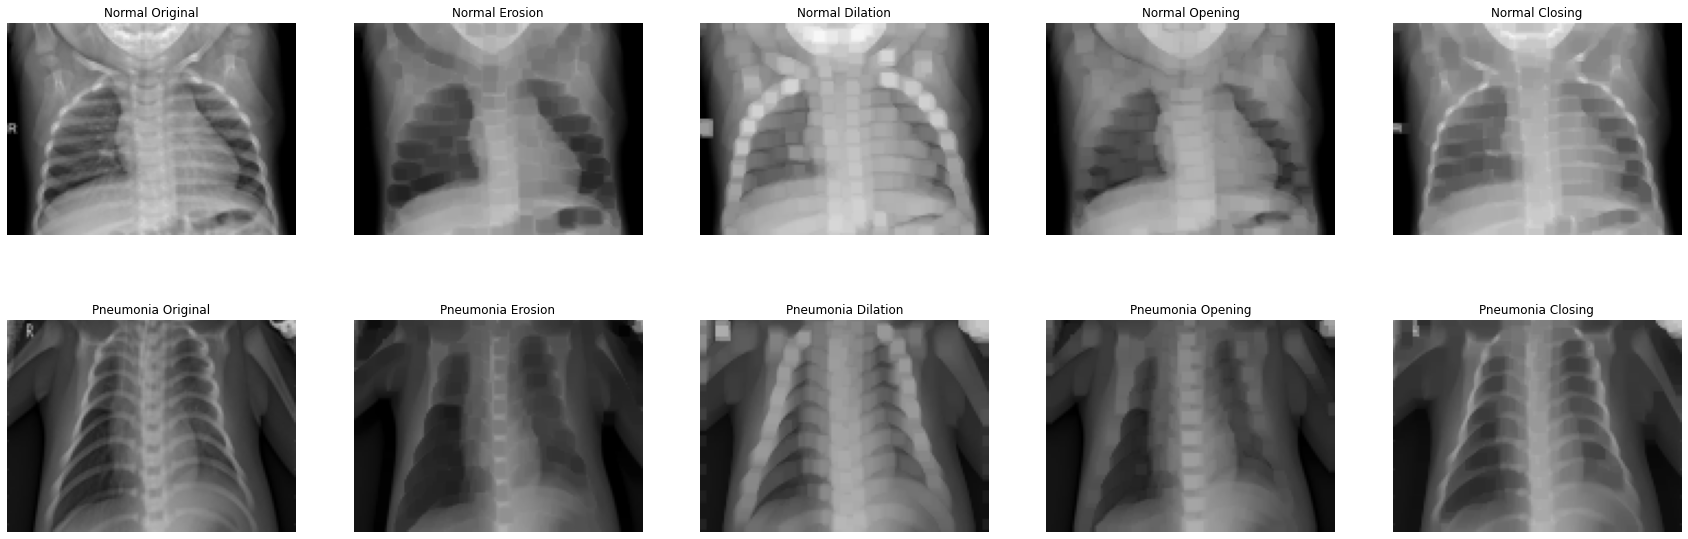

In [13]:
picture_1 = cv2.cvtColor(image_1, cv2.COLOR_BGR2RGB)
picture_2 = cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(30, 10))
plt.subplot(2, 5, 1)
plt.title('Normal Original')
plt.axis('off')
plt.imshow(picture_1)

# Define our kernel size
kernel = np.ones((5,5), np.uint8)

# Erode
erosion_1 = cv2.erode(picture_1, kernel, iterations = 1)

plt.subplot(2, 5, 2)
plt.title('Normal Erosion')
plt.axis('off')
plt.imshow(erosion_1)

# Dilation
dilation_1 = cv2.dilate(picture_1, kernel, iterations = 1)
plt.subplot(2, 5, 3)
plt.title('Normal Dilation')
plt.axis('off')
plt.imshow(dilation_1)


# Opening
opening_1 = cv2.morphologyEx(picture_1, cv2.MORPH_OPEN, kernel)
plt.subplot(2, 5, 4)
plt.title('Normal Opening')
plt.axis('off')
plt.imshow(opening_1)


# Closing
closing_1 = cv2.morphologyEx(picture_1, cv2.MORPH_CLOSE, kernel)
plt.subplot(2, 5, 5)
plt.title('Normal Closing')
plt.axis('off')
plt.imshow(closing_1)

# Now for pneumonia
plt.subplot(2, 5, 6)
plt.title('Pneumonia Original')
plt.axis('off')
plt.imshow(picture_2)

# Erode
erosion_2 = cv2.erode(picture_2, kernel, iterations = 1)

plt.subplot(2, 5, 7)
plt.title('Pneumonia Erosion')
plt.axis('off')
plt.imshow(erosion_2)

# Dilation
dilation_2 = cv2.dilate(picture_2, kernel, iterations = 1)
plt.subplot(2, 5, 8)
plt.title('Pneumonia Dilation')
plt.axis('off')
plt.imshow(dilation_2)


# Opening
opening_2 = cv2.morphologyEx(picture_2, cv2.MORPH_OPEN, kernel)
plt.subplot(2, 5, 9)
plt.title('Pneumonia Opening')
plt.axis('off')
plt.imshow(opening_2)


# Closing
closing_2 = cv2.morphologyEx(picture_2, cv2.MORPH_CLOSE, kernel)
plt.subplot(2, 5, 10)
plt.title('Pneumonia Closing')
plt.axis('off')
plt.imshow(closing_2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


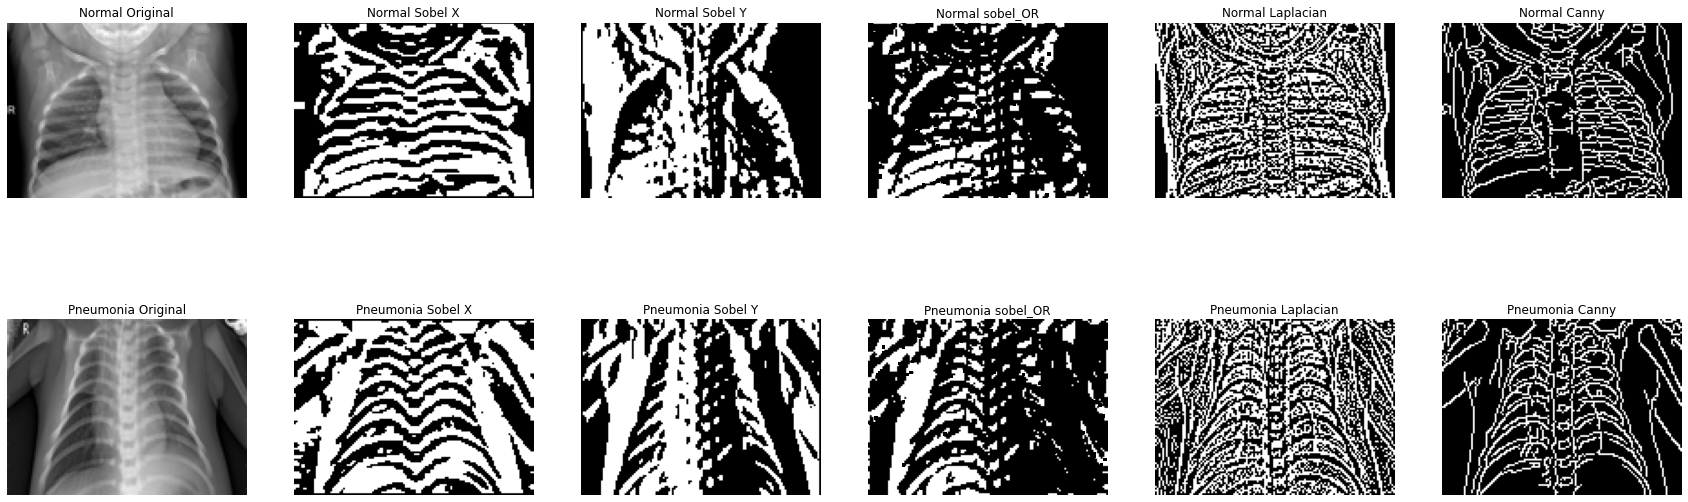

In [14]:
picture_1 = cv2.cvtColor(image_1, cv2.COLOR_BGR2RGB)
picture_2 = cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB)

height_1, width_1,_ = picture_1.shape
height_2, width_2,_ = picture_2.shape

# Extract Sobel Edges
sobel_1_x = cv2.Sobel(picture_1, cv2.CV_64F, 0, 1, ksize=5)
sobel_1_y = cv2.Sobel(picture_1, cv2.CV_64F, 1, 0, ksize=5)
sobel_2_x = cv2.Sobel(picture_2, cv2.CV_64F, 0, 1, ksize=5)
sobel_2_y = cv2.Sobel(picture_2, cv2.CV_64F, 1, 0, ksize=5)

plt.figure(figsize=(30, 10))

plt.subplot(2, 6, 1)
plt.title('Normal Original')
plt.axis('off')
plt.imshow(image_1)

plt.subplot(2, 6, 2)
plt.title('Normal Sobel X')
plt.axis('off')
plt.imshow(sobel_1_x)

plt.subplot(2, 6, 3)
plt.title('Normal Sobel Y')
plt.axis('off')
plt.imshow(sobel_1_y)

sobel_OR_1 = cv2.bitwise_or(sobel_1_x, sobel_1_y)

plt.subplot(2, 6, 4)
plt.title('Normal sobel_OR')
plt.axis('off')
plt.imshow(sobel_OR_1)

laplacian_1 = cv2.Laplacian(picture_1, cv2.CV_64F)

plt.subplot(2, 6, 5)
plt.title('Normal Laplacian')
plt.axis('off')
plt.imshow(laplacian_1)

canny_1 = cv2.Canny(picture_1, 50, 120)

plt.subplot(2, 6, 6)
plt.title('Normal Canny')
plt.axis('off')
plt.imshow(canny_1)

plt.subplot(2, 6, 7)
plt.title('Pneumonia Original')
plt.axis('off')
plt.imshow(image_2)

plt.subplot(2, 6, 8)
plt.title('Pneumonia Sobel X')
plt.axis('off')
plt.imshow(sobel_2_x)

plt.subplot(2, 6, 9)
plt.title('Pneumonia Sobel Y')
plt.axis('off')
plt.imshow(sobel_2_y)

sobel_OR_2 = cv2.bitwise_or(sobel_2_x, sobel_2_y)

plt.subplot(2, 6, 10)
plt.title('Pneumonia sobel_OR')
plt.axis('off')
plt.imshow(sobel_OR_2)

laplacian_2 = cv2.Laplacian(picture_2, cv2.CV_64F)

plt.subplot(2, 6, 11)
plt.title('Pneumonia Laplacian')
plt.axis('off')
plt.imshow(laplacian_2)

canny_2 = cv2.Canny(picture_2, 50, 120)

plt.subplot(2, 6, 12)
plt.title('Pneumonia Canny')
plt.axis('off')
plt.imshow(canny_2)

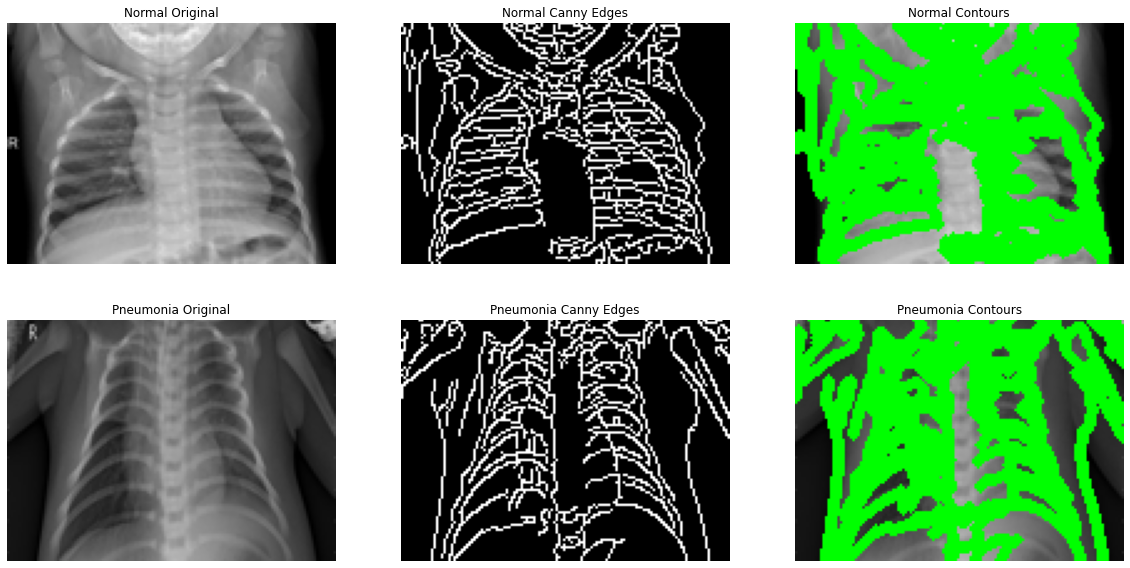

In [15]:
picture_1 = cv2.cvtColor(image_1, cv2.COLOR_BGR2RGB)
picture_2 = cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20, 10))

plt.subplot(2, 3, 1)
plt.title('Normal Original')
plt.axis('off')
plt.imshow(picture_1)


# Grayscale
gray_1 = cv2.cvtColor(picture_1,cv2.COLOR_BGR2GRAY)

# Find Canny edges
edged_1 = cv2.Canny(gray_1, 30, 200)

plt.subplot(2, 3, 2)
plt.title('Normal Canny Edges')
plt.axis('off')
plt.imshow(edged_1)

# Finding Contours
# Use a copy of your image e.g. edged.copy(), since findContours alters the image
contours_1, hierarchy_1 = cv2.findContours(edged_1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)


# Draw all contours
#
cv2.drawContours(picture_1, contours_1, -1, (0,255,0), 3)

plt.subplot(2, 3, 3)
plt.title('Normal Contours')
plt.axis('off')
plt.imshow(picture_1)

# Pneumonia
plt.subplot(2, 3, 4)
plt.title('Pneumonia Original')
plt.axis('off')
plt.imshow(picture_2)


# Grayscale
gray_2 = cv2.cvtColor(picture_2,cv2.COLOR_BGR2GRAY)

# Find Canny edges
edged_2 = cv2.Canny(gray_2, 30, 200)

plt.subplot(2, 3, 5)
plt.title('Pneumonia Canny Edges')
plt.axis('off')
plt.imshow(edged_2)

# Finding Contours
# Use a copy of your image e.g. edged.copy(), since findContours alters the image
contours_2, hierarchy_2 = cv2.findContours(edged_2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# Draw all contours
#
cv2.drawContours(picture_2, contours_2, -1, (0,255,0), 3)

plt.subplot(2, 3, 6)
plt.title('Pneumonia Contours')
plt.axis('off')
plt.imshow(picture_2)